# Assignment 3 - 1A (MLFFNN)

Team members:
- N Sowmya Manojna (BE17B007)
- Thakkar Riya Anandbhai (PH17B010)
- Chaithanya Krishna Moorthy (PH17B011)

## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = 12,8
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"

get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

import warnings
warnings.filterwarnings("ignore")

## Reading the data, Splitting it

In [2]:
# Get the data
column_names = ["x1", "x2", "y"]
df = pd.read_csv("train.csv", names=column_names)
df_test = pd.read_csv("dev.csv", names=column_names)
display(df.head())

# Split dev into test and validation
df_val, df_test = train_test_split(df_test, test_size=0.3, random_state=42)
display(df_val.head())
display(df_test.head())

,x1,x2,y
0,0.537115,0.452538,0.0
1,0.380729,0.371252,0.0
2,0.551707,0.496879,0.0
3,0.128153,0.337706,0.0
4,-0.893600,-2.493547,0.0


,x1,x2,y
67,-0.019659,-1.153679,2.0
31,1.436933,1.499611,1.0
75,-2.383817,0.405503,2.0
9,0.749243,-0.226078,0.0
68,-2.163703,1.187660,2.0


,x1,x2,y
40,-0.147620,-0.135928,1.0
22,0.015013,0.068611,0.0
55,2.889180,-0.051103,1.0
70,-2.105578,0.785977,2.0
0,0.438052,-2.337230,0.0


In [3]:
X_train = df[["x1", "x2"]].to_numpy()
y_train = df["y"].to_numpy().astype("int")

X_val = df_val[["x1", "x2"]].to_numpy()
y_val = df_val["y"].to_numpy().astype("int")

X_test = df_test[["x1", "x2"]].to_numpy()
y_test = df_test["y"].to_numpy().astype("int")

## Training the Model

In [4]:
# parameters = {"hidden_layer_sizes":[(5,5),(8,5),(8,8),10,15], "activation":["logistic", "tanh", "relu"], \
#               "solver":["lbfgs", "sgd", "adam"], "batch_size":[100, 200, "auto"], \
#               "alpha":[0, 0.0001], "learning_rate":["constant", "adaptive", "invscaling"], \
#              }
parameters = {"hidden_layer_sizes":[(5,5),(6,6),(7,7),(8,8),(9,9),(10,10)],\
              "activation":["logistic", "relu"], \
              "batch_size":[50, 100, 200], "early_stopping":[True, False], \
              "learning_rate":["constant", "adaptive", "invscaling"], \
              "alpha":[0.01, 0.001]
             }

mlp = MLPClassifier(random_state=1)

clf = GridSearchCV(mlp, parameters, verbose=1, n_jobs=6)
clf.fit(X_train, y_train)
result_df = pd.DataFrame(clf.cv_results_)
result_df.to_csv("1B_MLFFNN.csv")
result_df = result_df.sort_values(by=["rank_test_score", "mean_fit_time"])
result_df.head(10)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  9.1min
[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed: 10.7min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_batch_size,param_early_stopping,param_hidden_layer_sizes,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
352,5.111674,0.052329,0.002915,0.004061,relu,0.001,50,False,"(8, 8)",adaptive,"{'activation': 'relu', 'alpha': 0.001, 'batch_...",0.991667,0.991667,0.991667,0.975000,0.975,0.985000,0.008165,1
353,5.128052,0.068886,0.000897,0.000025,relu,0.001,50,False,"(8, 8)",invscaling,"{'activation': 'relu', 'alpha': 0.001, 'batch_...",0.991667,0.991667,0.991667,0.975000,0.975,0.985000,0.008165,1
243,5.141488,0.150874,0.004310,0.006611,relu,0.01,50,False,"(8, 8)",constant,"{'activation': 'relu', 'alpha': 0.01, 'batch_s...",0.991667,0.991667,0.991667,0.975000,0.975,0.985000,0.008165,1
351,5.148928,0.024337,0.000903,0.000034,relu,0.001,50,False,"(8, 8)",constant,"{'activation': 'relu', 'alpha': 0.001, 'batch_...",0.991667,0.991667,0.991667,0.975000,0.975,0.985000,0.008165,1
245,5.179837,0.034686,0.002909,0.004018,relu,0.01,50,False,"(8, 8)",invscaling,"{'activation': 'relu', 'alpha': 0.01, 'batch_s...",0.991667,0.991667,0.991667,0.975000,0.975,0.985000,0.008165,1
244,5.194781,0.047146,0.007100,0.003707,relu,0.01,50,False,"(8, 8)",adaptive,"{'activation': 'relu', 'alpha': 0.01, 'batch_s...",0.991667,0.991667,0.991667,0.975000,0.975,0.985000,0.008165,1
251,5.228093,0.033084,0.003045,0.004031,relu,0.01,50,False,"(10, 10)",invscaling,"{'activation': 'relu', 'alpha': 0.01, 'batch_s...",0.991667,0.983333,0.991667,0.991667,0.950,0.981667,0.016159,7
250,5.233712,0.071306,0.000939,0.000041,relu,0.01,50,False,"(10, 10)",adaptive,"{'activation': 'relu', 'alpha': 0.01, 'batch_s...",0.991667,0.983333,0.991667,0.991667,0.950,0.981667,0.016159,7
249,5.257564,0.050326,0.000938,0.000028,relu,0.01,50,False,"(10, 10)",constant,"{'activation': 'relu', 'alpha': 0.01, 'batch_s...",0.991667,0.983333,0.991667,0.991667,0.950,0.981667,0.016159,7
359,5.166897,0.039566,0.004617,0.004702,relu,0.001,50,False,"(10, 10)",invscaling,"{'activation': 'relu', 'alpha': 0.001, 'batch_...",0.991667,0.975000,0.991667,0.991667,0.950,0.980000,0.016330,10


In [5]:
print("Best Parameters Choosen:")
for i in clf.best_params_:
    print("  - ", i, ": ", clf.best_params_[i], sep="")

best_mlp = clf.best_estimator_

# best_mlp = MLPClassifier(random_state=1, activation="relu", alpha=0.1, \
#                     batch_size=50, early_stopping=False, max_iter=500, \
#                     hidden_layer_sizes=(8,8), learning_rate="constant")

# best_mlp.fit(X_train, y_train)

Best Parameters Choosen:
  - activation: relu
  - alpha: 0.01
  - batch_size: 50
  - early_stopping: False
  - hidden_layer_sizes: (8, 8)
  - learning_rate: constant


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Accuracy: 99.33333333333333


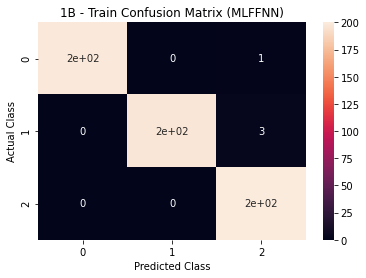

Validation Accuracy: 98.41269841269842


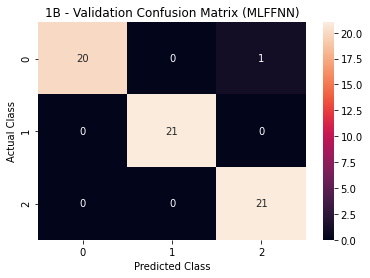

Validation Accuracy: 96.29629629629629


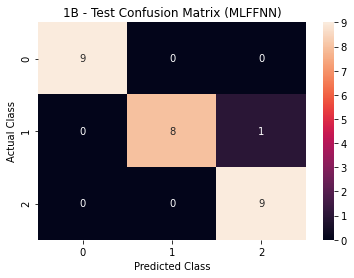

In [6]:
y_pred = best_mlp.predict(X_train)
print("Accuracy:", 100*np.sum(y_pred==y_train)/y_train.size)
conf_mat = confusion_matrix(y_train, y_pred)
plt.figure()
sns.heatmap(conf_mat, annot=True)
plt.title("1B - Train Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("1B_MLFFNN_train_confmat.png")
plt.show()

y_val_pred = best_mlp.predict(X_val)
print("Validation Accuracy:", 100*np.sum(y_val_pred==y_val)/y_val.size)
val_conf_mat = confusion_matrix(y_val, y_val_pred)
plt.figure()
sns.heatmap(val_conf_mat, annot=True)
plt.title("1B - Validation Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("1B_MLFFNN_val_confmat.png")
plt.show()

y_test_pred = best_mlp.predict(X_test)
print("Validation Accuracy:", 100*np.sum(y_test_pred==y_test)/y_test.size)
test_conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(test_conf_mat, annot=True)
plt.title("1B - Test Confusion Matrix (MLFFNN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.savefig("1B_MLFFNN_test_confmat.png")
plt.show()

In [7]:
d = pd.DataFrame(y_pred, columns=["pred"])
d["actual"] = y_train
d.groupby(["pred"]).count()

,actual
pred,
0,199
1,197
2,204


## Visualising the decision boundaries

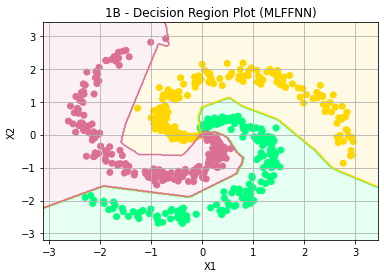

In [8]:
h = 0.02
x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_pro = np.argmax(best_mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z_pro = Z_pro.reshape(xx.shape)

color_list = ["springgreen", "gold", "palevioletred", "cyan"]
plt.title("1B - Decision Region Plot (MLFFNN)")
plt.contourf(xx, yy, Z_pro, np.unique(Z_pro).size-1, colors=color_list, alpha=0.1)
plt.contour(xx, yy, Z_pro, np.unique(Z_pro).size-1, colors=color_list, alpha=1)
plt.scatter(X_train[:,0], X_train[:,1], c=[color_list[i] for i in y_train])
plt.xlabel("X1")
plt.ylabel("X2")
plt.savefig("1B_MLFFNN_Decision_Plot.png")
plt.show()

In [8]:
a = best_mlp.predict_proba(X_train)